In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

plt.style.use('ggplot')

Рассмотрим **распределение Пуассона** с параметром $\lambda = 2$.

In [ ]:
poisson_rv = sts.poisson(2)

Рассчитаем реальное **истинное значение средней величины** и **дисперсию** для выбранного распределения (будут совпадать с параметром $\lambda$)

In [ ]:
real_mean, real_disp = poisson_rv.stats(moments='mv')

# 1. Визуальная проверка выполнения ЗБЧ

**Закон больших чисел** говорит о том, что *при достаточно большом объеме выборки из некоторой случайной величины*, удовлетворяющей определенным условиям (например, при условии наличия конечной дисперсии), *выборочное среднее данной выборки близко к истинному значению среднего*.

Для того, чтобы убедиться в выполнении **ЗБЧ** для выбранного распределения Пуассона, ***сгенерируем 4 независимых выборки объемом 200 и выведем на один график нарастающее среднее*** (синяя линия) и ***истинное среднее***, рассчитанное теоретически (красная линия)

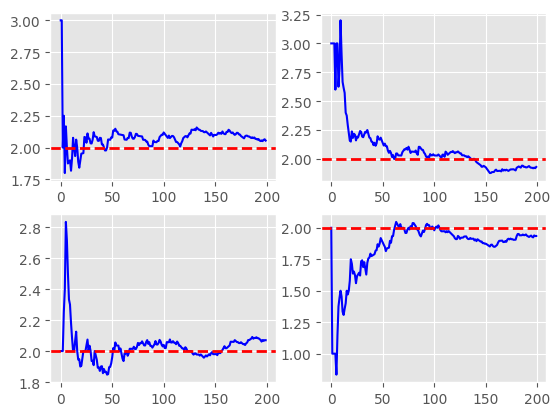

In [ ]:
plt.figure()

for i in range(1, 5):
  rv = poisson_rv.rvs(size=200) # Извлечение новой выборки
  plt.subplot(2, 2, i)
  plt.plot(rv.cumsum()/np.arange(1, 201), color='b') # Нанесение графика нарастающего выборочного среднего
  plt.axhline(real_mean, color='r', linewidth=2, linestyle='dashed') # Нанесение линии уровня истинного среднего

plt.show()

Как можно заметить, при ***увеличинии числа наблюдений исходной случайной величины, независимо от конкретных ее реализаций, выборочное среднее становится все ближе к истинному среднему и отличается от него уже достаточно мало при сравнительно небольшом объеме***; следовательно можно утверждать, что **ЗБЧ** для данного распределения действительно выполняется.  

# 2 Наглядная демонстрация Центральной предельной теоремы

**Центральная предельная теорема** утверждает, что *при достаточно большом объеме выборки из некоторой случайной величины, удовлетворяющей определенным условиям, выборочное среднее после z-преобразования будет по распредлению сходится к стандартному нормальному распределению*

Для демонстрации работы ЦПТ для рассматриваемого распределения Пуассона сперва сгенерируем большое кол-во ее реализаций (для последующего расчета распределения среднего)

In [ ]:
n = 1000
rv = poisson_rv.rvs((100000, n))

Из полученной выборки будет последовательно извлекать все большие части, рассчитывать распределение стандартизованного выборочного среднего и выводить гистограмму распределения

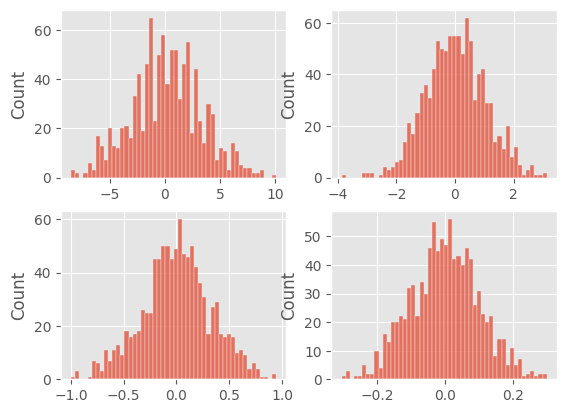

In [ ]:
plt.figure()

for i in [100, 1000, 10000, 100000]:
  plt.subplot(2, 2, int(np.log10(i) - 1))
  current_rvs = rv[:i] # Извлечение части выборки
  centred_rvs = (current_rvs.mean(axis=0) - real_mean) / np.sqrt(real_disp / n) # z-преобразование
  sns.histplot((rv[:i].mean(axis=0) - real_mean) / np.sqrt(real_disp / n), bins=50) # нанесение гистограммы

plt.show()

Как можно заметить, ***при увелечении объема выборки для рассчета, гистограмма становится все более похожей на плотность нормального стандартного распределения***: *прослеживается большая симметричность, мода все более смещается в точку 0, хвосты становятся все менее тяжелыми и т.д.*; это дает некоторое наглядное представление о принципе работы **ЦПТ**

# 3-5 Построение доверительных интервалов

Для последующего построения доверительных интервалов сгенерируем три выборки из исходной случайной величины

In [ ]:
small_rv = poisson_rv.rvs(size=25)
medium_rv = poisson_rv.rvs(size=100)
large_rv = poisson_rv.rvs(size=1000)

In [ ]:
data = {}

## 3 Ассимптотические доверительные интервалы для среднего

Для построения ассимптотического доверительного интервала для среднего значения исходного распределения используется следующая формула:


> $\overline{x}$ ± $z_{1-\alpha/2}$ * $\sqrt{\hat{s}^2 / n}$

Где знак минус соответствует левой границе интервала, а плюс - правой

In [ ]:
def assymptotic_interval(rvs, alpha=0.05):
  """
      Построение ассимптотического доверительного интервала для среднего значения по выборке rvs на уровне доверия 1 - alpha
  """
  z_crit = sts.norm.ppf(1 - alpha / 2, loc=0, scale=1) # Получение необходимой квантили стандартного нормального распределения

  left = rvs.mean() - z_crit * np.sqrt(rvs.var(ddof=1) / rvs.shape[0]) # Расчет левой границы интервала
  right = rvs.mean() + z_crit * np.sqrt(rvs.var(ddof=1) / rvs.shape[0]) # Расчет правой границы интервала

  return left, right

Найдем доверительные интервалы для **среднего значения** по каждой выборке (истинное значение - 2)

In [ ]:
assymp_l1, assymp_r1 = assymptotic_interval(small_rv)
(assymp_l1, assymp_r1), assymp_r1 - assymp_l1

((1.1426539073736213, 1.8973460926263788), 0.7546921852527575)

In [ ]:
assymp_l2, assymp_r2 = assymptotic_interval(medium_rv)
(assymp_l2, assymp_r2), assymp_r2 - assymp_l2

((1.6709010062567051, 2.229098993743295), 0.5581979874865897)

In [ ]:
assymp_l3, assymp_r3 = assymptotic_interval(large_rv)
(assymp_l3, assymp_r3), assymp_r3 - assymp_l3

((1.9188021438774923, 2.095197856122508), 0.17639571224501593)

В первом случае получившийся интервал * не покрывает истинное значение среднего*, а значит его можно признать *не соответствующими исходному распределению*; в остальных случаях истинное значние *принадлежит полученному доверительному интервалу*, а значит их можно признать вполне *адекватными генеральному распределению*. При этом, *при увеличении объема выборки ширина доверительного интервала существенно уменьшается*, при этом сохраняется тот же уровень надежности

In [ ]:
data["Ассимптотический для среднего"] = [(assymp_l1, assymp_r1),(assymp_l2, assymp_r2), (assymp_l3, assymp_r3)]

## 4 Точные доверительные интервалы для среднего

Для построения точного доверительного интервала для среднего значения исходного распределения используется следующая формула:


> $\overline{x}$ ± $t_{1-\alpha/2}$ * $\sqrt{\hat{s}^2 / n}$

Где знак минус соответствует левой границе интервала, а плюс - правой

In [ ]:
def precise_interval(rvs, alpha=0.05):
  """
      Построение точного доверительного интервала для среднего значения по выборке rvs на уровне доверия 1 - alpha
  """
  n = rvs.shape[0]
  t_crit = sts.t.ppf(1 - alpha / 2, df=n-1, loc=0, scale=1) # Получение необходимой квантили стандартного нормального распределения

  left = rvs.mean() - t_crit * np.sqrt(rvs.var(ddof=1) / n) # Расчет левой границы интервала
  right = rvs.mean() + t_crit * np.sqrt(rvs.var(ddof=1) / n) # Расчет правой границы интервала

  return left, right

Найдем доверительные интервалы для **среднего значения** по каждой выборке (истинное значение - 2)

In [ ]:
prec_l1, prec_r1 = precise_interval(small_rv)
(prec_l1, prec_r1), prec_r1 - prec_l1

((1.1226436893990686, 1.9173563106009315), 0.7947126212018629)

In [ ]:
prec_l2, prec_r2 = precise_interval(medium_rv)
(prec_l2, prec_r2), prec_r2 - prec_l2

((1.6674473822464546, 2.2325526177535453), 0.5651052355070907)

In [ ]:
prec_l3, prec_r3 = precise_interval(large_rv)
(prec_l3, prec_r3), prec_r3 - prec_l3

((1.9186951580654197, 2.0953048419345803), 0.17660968386916065)

И снова, во всех случаях кроме первого полученный интервал *покрывает истинное значение среднего*, а значит их можно признать *соответствующими исходному распределению* (в первом случае, соответственно, интервал не адекватен генеральной случайной величине) ; при этом, *при увеличении объема выборки ширина доверительного интервала существенно уменьшается*, при этом сохраняется тот же уровень надежности. При этом, при небольших объемах выборки точный доверительный интервал *имеет большую длину, чем ассимптотический*; при увелечении объема они начинают практически совпадать

In [ ]:
data["Точный для среднего"] = [(prec_l1, prec_r1), (prec_l2, prec_r2), (prec_l3, prec_r3)]

## 5 Эфроновы доверительные интервалы

Для вычисления Эфроновых доверительных интервалов используются квантили псевдораспредления исследуемой статистики, полученной по выборке путем многократного вычисления этой статистики на некоторой случайной подвыборки из исходной.

In [ ]:
def bootstrap_interval(rvs, stat, alpha=0.05):
  """
      Построение эфронова доверительного интервала для выбранной статистики stat (передаваемой в виде функции) по выборке rvs на уровне доверия 1 - alpha
  """
  n = rvs.shape[0]
  distribution_lst = []
  for _ in range(100):
    a_ = np.random.choice(rvs, size=n, replace=True) # Получение подвыборки
    distribution_lst.append(stat(a_)) # Расчет искомой статистики для подвыборки и добавление в псевдораспределение

  return np.percentile(distribution_lst, q=[alpha / 2 * 100, (1 - alpha / 2) * 100]) # Возвращение требуемого доверительного интервала по полученному псевдораспределению статистики

Найдем эфроновы интервалы для **среднего** (истинное значение - 2)

In [ ]:
interv = bootstrap_interval(small_rv, np.mean)
efr_mean_l1 = interv[0]
efr_mean_r1 = interv[1]
(efr_mean_l1, efr_mean_r1), efr_mean_r1 - efr_mean_l1

((1.16, 1.8609999999999995), 0.7009999999999996)

In [ ]:
interv = bootstrap_interval(medium_rv, np.mean)
efr_mean_l2 = interv[0]
efr_mean_r2 = interv[1]
(efr_mean_l2, efr_mean_r2), efr_mean_r2 - efr_mean_l2

((1.63, 2.2), 0.5700000000000003)

In [ ]:
interv = bootstrap_interval(large_rv, np.mean)
efr_mean_l3 = interv[0]
efr_mean_r3 = interv[1]
(efr_mean_l3, efr_mean_r3), efr_mean_r3 - efr_mean_l3

((1.92485, 2.104525), 0.17967500000000025)

Заметим, что при увеличении объема выборки *длина получаемого интервала уменьшалась*. При этом, для первых выборки интервал вновь *не покрывает истинное значение среднего*, а значит его можно признать *не соответствующими исходному распределению*; в случае же средней и большой выборок *истинное значение лежит внутри полученного интервала*, следовательно они фактическому распределению *соответствуют*

In [ ]:
data["Бутстреп для среднего"] = [(efr_mean_l1, efr_mean_r1),(efr_mean_l2, efr_mean_r2), (efr_mean_l3, efr_mean_r3)]

Найдем эфроновы интервалы для **медианы** (истинное значение - 2)

In [ ]:
interv = bootstrap_interval(small_rv, np.median)
efr_median_l1 = interv[0]
efr_median_r1 = interv[1]
(efr_median_l1, efr_median_r1), efr_median_r1 - efr_median_l1

((1.0, 2.0), 1.0)

In [ ]:
interv = bootstrap_interval(medium_rv, np.median)
efr_median_l2 = interv[0]
efr_median_r2 = interv[1]
(efr_median_l2, efr_median_r2), efr_median_r2 - efr_median_l2

((1.7375, 2.0), 0.26249999999999996)

In [ ]:
interv = bootstrap_interval(large_rv, np.median)
efr_median_l3 = interv[0]
efr_median_r3 = interv[1]
(efr_median_l3, efr_median_r3), efr_median_r3 - efr_median_l3

((2.0, 2.0), 0.0)

Заметим, что при увеличении объема выборки *длина получаемого интервала уменьшалась*. При этом, для первых двух выборок интервал *покрывает истинное значение медианы*, а значит их можно признать *соответствующими исходному распределению*; в случае же большой выборки была получена лишь точечная оценка, *соответствующая* истинному значению

In [ ]:
data["Бутстреп для медианы"] = [(efr_median_l1, efr_median_r1), (efr_median_l2, efr_median_r2), (efr_median_l3, efr_median_r3)]

Найдем эфроновы интервалы для **дисперсии** (истинное значение - 2)

In [ ]:
interv = bootstrap_interval(small_rv, np.var)
efr_var_l1 = interv[0]
efr_var_r1 = interv[1]
(efr_var_l1, efr_var_r1), efr_var_r1 - efr_var_l1

((0.55128, 1.1927199999999998), 0.6414399999999998)

In [ ]:
interv = bootstrap_interval(medium_rv, np.var)
efr_var_l2 = interv[0]
efr_var_r2 = interv[1]
(efr_var_l2, efr_var_r2), efr_var_r2 - efr_var_l2

((1.63862, 2.3341), 0.6954799999999999)

In [ ]:
interv = bootstrap_interval(large_rv, np.var)
efr_var_l3 = interv[0]
efr_var_r3 = interv[1]
(efr_var_l3, efr_var_r3), efr_var_r3 - efr_var_l3

((1.8374067749999998, 2.2087718), 0.37136502500000024)

Заметим, что при увеличении объема выборки *длина получаемого интервала уменьшалась*. При этом, для первой выбороки интервал *не покрывает истинное значение дисперсии*, а значит его нельзя признать *соответствующим исходному распределению*; в других случаях *истинное значение входит в полученные интервалы*, следовательно они фактическому распределению *соответствуют*

In [ ]:
data["Бутстреп для дисперсии"] = [(efr_var_l1, efr_var_r1), (efr_var_l2, efr_var_r2), (efr_var_l3, efr_var_r3)]

Найдем эфроновы интервалы для **моды** (истинное значение - 2)

In [ ]:
from statistics import mode

In [ ]:
interv = bootstrap_interval(small_rv, mode)
efr_mode_l1 = interv[0]
efr_mode_r1 = interv[1]
(efr_mode_l1, efr_mode_r1), efr_mode_r1 - efr_mode_l1

((1.0, 2.5249999999999915), 1.5249999999999915)

In [ ]:
interv = bootstrap_interval(medium_rv, mode)
efr_mode_l2 = interv[0]
efr_mode_r2 = interv[1]
(efr_mode_l2, efr_mode_r2), efr_mode_r2 - efr_mode_l2

((0.0, 2.0), 2.0)

In [ ]:
interv = bootstrap_interval(large_rv, mode)
efr_mode_l3 = interv[0]
efr_mode_r3 = interv[1]
(efr_mode_l3, efr_mode_r3), efr_mode_r3 - efr_mode_l3

((1.0, 2.0), 1.0)

Заметим, что при увеличении объема выборки *длина получаемого интервала уменьшалась*. При этом, во всех случаях интервал *покрывает истинное значение моды*, а значит их можно признать *соответствующими исходному распределению*

In [ ]:
data["Бутстреп для моды"] = [(efr_mode_l1, efr_mode_r1), (efr_mode_l2, efr_mode_r2), (efr_mode_l3, efr_mode_r3)]

**Сводная таблица по интервалам**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data, index = ["Малый объем выборки (25)", "Средний объем выборки (100)", "Большой объем выборки (1000)"])
df

,Ассимптотический для среднего,Точный для среднего,Бутстреп для среднего,Бутстреп для медианы,Бутстреп для дисперсии,Бутстреп для моды
Малый объем выборки (25),"(1.1426539073736213, 1.8973460926263788)","(1.1226436893990686, 1.9173563106009315)","(1.16, 1.8609999999999995)","(1.0, 2.0)","(0.55128, 1.1927199999999998)","(1.0, 2.5249999999999915)"
Средний объем выборки (100),"(1.6709010062567051, 2.229098993743295)","(1.6674473822464546, 2.2325526177535453)","(1.63, 2.2)","(1.7375, 2.0)","(1.63862, 2.3341)","(0.0, 2.0)"
Большой объем выборки (1000),"(1.9188021438774923, 2.095197856122508)","(1.9186951580654197, 2.0953048419345803)","(1.92485, 2.104525)","(2.0, 2.0)","(1.8374067749999998, 2.2087718)","(1.0, 2.0)"
